# Task 5: Comparison between the algorithms

In [3]:
import numpy as np
import time
import math
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [5]:
# Returns a vector, which is the result of the gradient
def gradient(A, b, x):
    return A.dot(x) - b

# Returns a scalar, which is the norm of the result above
def gradientNorm(A, b, x):
    return np.linalg.norm(A.dot(x) - b)

# Returns a scalar, which is the norm of the difference between x and x*
def differenceNorm(x, x_opt):
    return np.linalg.norm(x - x_opt)

# Returns a scalar, which is the norm of x
def norm(x):
    return np.linalg.norm(x)

### The four algorithms implemented in the previous tasks

In [48]:
def gradientDescent(A, b, maxIters = 5000, epsilon = 10e-5):    
    # Dimension of A and b
    dim = b.size
    # initial random vector x filled with the mean of matrix A, with length equal to the dimension
    x = np.repeat(np.mean(A), dim)
    # Fixed step size
    alpha = 0.0001
    # currentIteration
    iter = 1
    # Saving the results
    x_iterations = [x]
    while (gradientNorm(A, b, x) > epsilon and iter <= maxIters):
        x = x - alpha * gradient(A, b, x)
        x_iterations.append(x)
        iter += 1
    
    if iter > maxIters:
        stoppingReason = f"Max iterations ({maxIters}) exceeded"
    else:
        stoppingReason = f"Gradient norm smaller than {epsilon}\nCompleted iteration: {iter}"
    return (x, x_iterations, stoppingReason)

def conjugateGradient(A, b, maxIters = 5000, epsilon = 10e-5, period = 100):    
    # Dimension of A and b
    dim = b.size
    # initial random vector x filled with the mean of matrix A, with length equal to the dimension
    x = np.repeat(np.mean(A), dim)
    # Fixed step size
    alpha = 0.0001
    # currentIteration
    iter = 1
    # Saving the results
    x_iterations = [x]

    gradients = []
    gradientNorms = []

    rhos = []
    
    while (gradientNorm(A, b, x) > epsilon and iter <= maxIters):
        if (iter % period == 1):
            gradientNorms.append(gradientNorm(A,b,x))
            gradientVector = gradient(A, b, x)
            gradients.append(gradientVector)
            rho = - gradientVector
            rhos.append(rho)
            x = x + alpha * rho
            x_iterations.append(x)        
        else:
            gradientNorms.append(gradientNorm(A,b,x))
            gradients.append(gradient(A, b, x))
            delta = (gradientNorms[iter - 1] ** 2)/(gradientNorms[iter - 2] ** 2)
            rho = - gradients[iter - 1] + delta * rhos[iter - 2]
            rhos.append(rho)
            x = x + alpha * rho
            x_iterations.append(x)
        iter += 1
    
    if iter > maxIters:
        stoppingReason = f"Max iterations ({maxIters}) exceeded"
    else:
        stoppingReason = f"Gradient norm smaller than {epsilon}\nCompleted iteration: {iter}"
    return (x, x_iterations, stoppingReason)

def FISTA(A, b, maxIters = 5000, epsilon = 10e-5):    
    # Dimension of A and b
    dim = b.size
    # initial random vector x0 filled with the mean of matrix A, with length equal to the dimension
    x = np.repeat(np.mean(A), dim)
    # assign y1 equals to x0
    y = x
    # assign t equals to 1
    t = 1
    # currentIteration
    iter = 1
    # Saving the results
    x_iterations = []
    y_iterations = []
    t_iterations = []

    gradients = []
    
    L = 0.5 * np.linalg.norm(A * A.transpose())
    
    while (gradientNorm(A, b, x) > epsilon and iter <= maxIters):
        # For example, this is the first iteration, where k = 1 (iter = 1)
        # Saving the previous x, which is x0
        previous_x = x
        # x is now x1, y ix now y1
        x = y - 1/L * gradient(A, b, y)
        x_iterations.append(x)
        # Saving the previous t, which is t1
        previous_t = t
        # t is now t2 and the latter t is still t1
        t = 1/2 * (1 + math.sqrt(1 + 4 * (previous_t ** 2)))
        # y is now y2, x is x1 and x_previous is x0
        y = x + (previous_t - 1)/t * (x - previous_x)
        iter += 1
    
    if iter > maxIters:
        stoppingReason = f"Max iterations ({maxIters}) exceeded"
    else:
        stoppingReason = f"Gradient norm smaller than {epsilon}\nCompleted iteration: {iter - 1}"
    return (x, x_iterations, stoppingReason)
    
def coordinateDescent(A, b, maxIters = 5000, epsilon = 10e-5, period = 100):    
    # Dimension of A and b
    dim = b.size
    # initial random vector x filled with the mean of matrix A, with length equal to the dimension
    x = np.repeat(np.mean(A), dim)
    # Fixed step size
    alpha = 0.0001
    # currentIteration
    iter = 1
    # Saving the results
    x_iterations = []
    # Lipschitz constant
    L = np.linalg.norm(A * A.transpose())
    range
    while (gradientNorm(A, b, x) > epsilon and iter <= maxIters):
        for index in range(0, dim):
            x_totalGradient = x - alpha * gradient(A, b, x)
            x[index] = x_totalGradient[index]
            x_iterations.append(x)
            iter += 1
    
    if iter > maxIters:
        stoppingReason = f"Max iterations ({maxIters}) exceeded"
    else:
        stoppingReason = f"Gradient norm smaller than {epsilon}"
    return (x, x_iterations, stoppingReason)

In [49]:
# Plotting the difference norms log ||x - x*||2
def plotDifferenceNormsMutipleAlgorithms(scale, maxIter, tolerance, algorithmNames, algorithms):

    A = np.load(f"{scale}Matrix.npy", allow_pickle=True)
    # print("The matrix A")
    # print(A)

    b = np.load(f"{scale}Vector.npy", allow_pickle=True)
    # print("\nThe vector b")
    # print(b)
    x_opt = np.load(f"{scale}Solution.npy", allow_pickle=True)

    print(f"\nThe {scale} scale problem is chosen. The matrix A and vector b dimension is {b.size}")
    print(f"The number of maximum iterations is {maxIter}. The allowed tolerance for gradient norm is {tolerance}" )

    if scale == "huge":
        print("\nFirst 100 values in the theoretical optimal solution x*")
        print(x_opt[0:100])
    else:
        print("\nThe theoretical optimal solution x*")
        print(x_opt)

    figure(figsize=(8, 6), dpi=80)

    for i in range(0, len(algorithms)):
        start = time.time()
        x_opt_algo, x_iterations_algo, stoppingReason = algorithms[i](A, b, maxIter, tolerance)
        end = time.time()
        print(f"\nThe {algorithmNames[i]} algorithm runs in {end - start} seconds")
        print("Reason of stopping")
        print(stoppingReason)
        if scale == "huge":
            print(f"\nFirst 100 values in the optimal solution x found by {algorithmNames[i]} algorithm")
            print(x_opt_algo[1:101])
        else:
            print(f"\nThe optimal solution x found by {algorithmNames[i]} algorithm")
            print(x_opt_algo)

        differenceNorms = []
        for x_sol in x_iterations_algo:
            differenceNorms.append(differenceNorm(x_sol, x_opt))
        differenceNorms = np.array(differenceNorms)

        iterations = np.arange(0, differenceNorms.size, 1)
        plt.plot(iterations, differenceNorms, label = algorithmNames[i])#, marker='.', markersize=5)
    
    size = 16

    plt.title(f"Convergence rate comparison\nbetween optimization algorithms", size=size + 4)
    plt.xticks(fontsize=size)    
    plt.yticks(fontsize=size)  
    plt.yscale('log')
    # plt.xlim(left = 1)
    # plt.xticks(list(plt.xticks()[0]) + [1])
    plt.xlabel("Iterations", size=size)
    plt.ylabel(r'$log||x-x*||_2$', size=size)

    legend = plt.legend(loc=4, frameon=False, fontsize=size - 2)
    plt.show()


The small scale problem is chosen. The matrix A and vector b dimension is 10
The number of maximum iterations is 10000. The allowed tolerance for gradient norm is 0.0001

The theoretical optimal solution x*
[ 1  2  3  4  5  6  7  8  9 10]

The gradient descent algorithm runs in 0.09000253677368164 seconds
Reason of stopping
Max iterations (10000) exceeded

The optimal solution x found by gradient descent algorithm
[2.78299778 4.79020935 4.65091871 3.58798258 6.46530758 6.83598961
 5.86109348 5.56268642 5.22518737 7.72119047]

The conjugate gradient algorithm runs in 0.16100239753723145 seconds
Reason of stopping
Max iterations (10000) exceeded

The optimal solution x found by conjugate gradient algorithm
[ 0.65388544  2.26199934  3.73402579  4.66002904  5.95830116  6.64647838
  6.17339075  6.7287502   7.45585667 10.19780875]

The FISTA algorithm runs in 0.018998146057128906 seconds
Reason of stopping
Gradient norm smaller than 0.0001
Completed iteration: 1601

The optimal solution x f

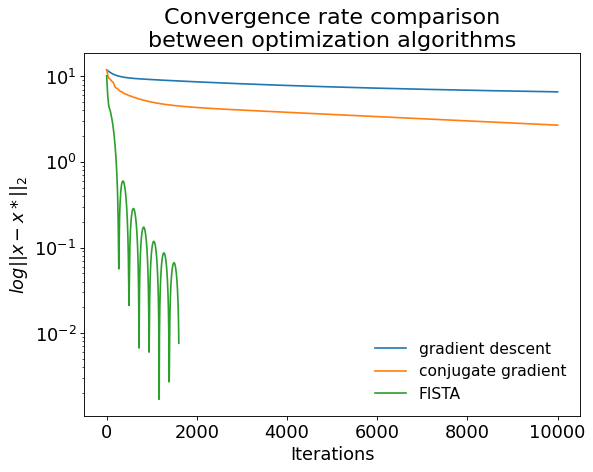

In [50]:
scales = ["small", "large", "huge"]
maxIters = [10000, 20000, 50000]
tolerances = [10e-5, 10e-4, 10e-3]
algorithmNames = ["gradient descent", "conjugate gradient", "FISTA"]
algorithms = [gradientDescent, conjugateGradient, FISTA] #, coordinateDescent]
for i in range(0,1):
    plotDifferenceNormsMutipleAlgorithms(scales[i], maxIters[i], tolerances[i], algorithmNames, algorithms)